In [1]:
#decision tree
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [2]:
df=pd.read_csv('Student Depression Dataset.csv')
df.head()
df.describe()
print(df.columns)
print(df['Sleep Duration'].unique())  # Inspect values

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')
['5-6 hours' 'Less than 5 hours' '7-8 hours' 'More than 8 hours' 'Others']


In [3]:
label_encoder = preprocessing.LabelEncoder()
df['Sleep Duration']= label_encoder.fit_transform(df['Sleep Duration'])
df['Sleep Duration'].unique()

array([0, 2, 1, 3, 4])

In [4]:
x=df[['Academic Pressure','Work Pressure','Sleep Duration']]
y=df['Age']
print(df.isnull().sum())
df.dropna(inplace=True)

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64


In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model= DecisionTreeClassifier()
model.fit(x_train, y_train)
print(model.score(x_test, y_test))
y_pred = model.predict(x_test)
print(y_pred)

0.08815624440064504
[24. 24. 20. ... 24. 21. 24.]


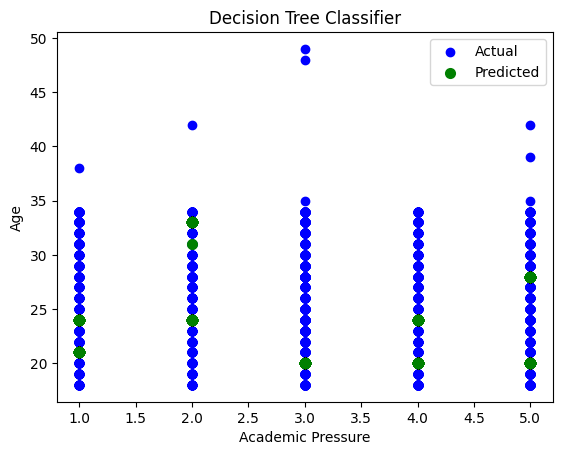

In [6]:
plt.scatter(x_test['Academic Pressure'], y_test, color='blue', label='Actual')
plt.scatter(x_test['Academic Pressure'], y_pred, color='green', label='Predicted', linewidths=2)
plt.title('Decision Tree Classifier')
plt.xlabel('Academic Pressure')
plt.ylabel('Age')
plt.legend()
plt.show()